# Get the voice filepath

In [44]:
import glob
import os
import shutil
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [4]:
wavdata=glob.glob(r'.\convert_corpus\*\*\*\*.wav')

In [5]:
#show the result
wavdata

['.\\convert_corpus\\person1\\time1\\group1\\ba1.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\da4.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\er4.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\ge4.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\he2.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\huo3.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\liu4.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\mu4.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\ren2.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\ru4.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\san1.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\shang4.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\shi2.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\tian1.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\tu3.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\wen2.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\xia4.wav',
 '.\\convert_corpus\\person1\\time1\\group1\\yi1.wav'

# move all the voice data to the dstpath

In [6]:
if not os.path.exists('./voice_data/'):
    os.makedirs('./voice_data/')
for path in wavdata:
    person=path.split('\\')[2]
    time=path.split('\\')[3]
    group=path.split('\\')[4]
    #get filename
    path_filename=os.path.split(path)[-1].split('.')[0]
    #filter the character
    path_filename_character=''.join(list(filter(str.isalpha,path_filename)))
    # filter the digits
    path_filename_digits=list(filter(str.isdigit,path_filename))[0]
    # concat the filename
    dst_filename=person+'_'+time+'_'+group+'_'+path_filename_character+'_'+path_filename_digits+'.wav'
    dst_path=os.path.join('./voice_data/',dst_filename)
    shutil.copy(path,dst_path)
print('Move Complete!')

Move Complete!


In [8]:
wavedata=glob.glob('./voice_data/*.wav')
print('The dataset contains %s samples!'%len(wavdata))

The dataset contains 4704 samples!


# MFCC

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import python_speech_features
import scipy
import sklearn
import scipy.io.wavfile as wav
from python_speech_features import mfcc
%matplotlib inline

## We can plot the waveplot of a wav file

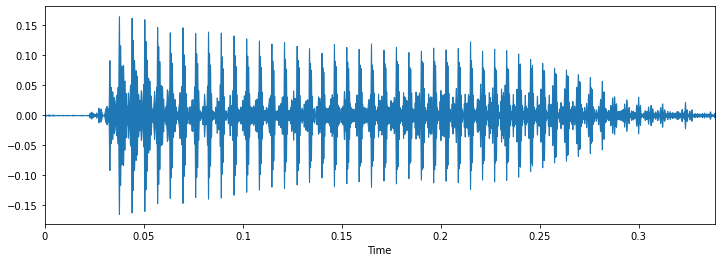

In [10]:
x, sr = librosa.load('./voice_data/person10_time1_group1_ba_1.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

(20, 15)


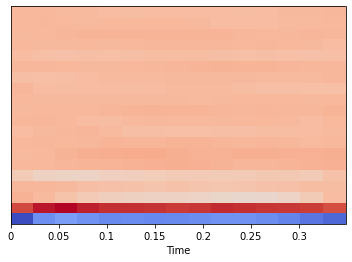

In [11]:
# extract mfcc
mfcc=librosa.feature.mfcc(x, sr=sr)
# get the feature 
print(mfcc.shape)
# plot the mfcc feature
librosa.display.specshow(mfcc, sr=sr, x_axis='time')

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


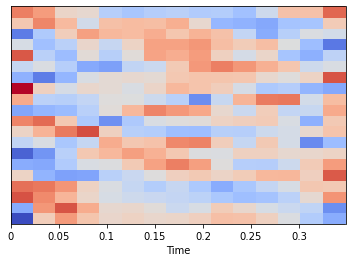

In [12]:
# Center to the mean and component wise scale to unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
# plot the feature after scale
librosa.display.specshow(mfcc, sr=sr, x_axis='time')

## Perform 1st order difference and 2nd order difference

In [13]:
import numpy as np

In [14]:
mfcc_diff=np.diff(mfcc,axis=0)
print(mfcc_diff.shape)

(19, 15)


In [15]:
mfcc_diff_diff=np.diff(mfcc_diff,axis=0)
print(mfcc_diff_diff.shape)

(18, 15)


## Concate all features

In [16]:
#concatenate mfcc,mfcc_diff and mfcc_diff_diff
mfccs=np.concatenate([mfcc,mfcc_diff,mfcc_diff_diff],axis=0)

In [17]:
print(mfccs.shape)

(57, 15)


# Data Preprocessing

In [18]:
import glob
import string
import os

## get_mfcc_feature
If the length<50(the max length of mfccs is 43),we should pad the sequence with 0

In [19]:
def get_mfcc_feature(path,maxlen=50):
    x, sr = librosa.load(path)
    # extract mfcc
    mfcc = librosa.feature.mfcc(x, sr=sr)
    # Center to the mean and component wise scale to unit variance
    mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
    mfcc_diff = np.diff(mfcc, axis=0)
    mfcc_diff_diff = np.diff(mfcc_diff, axis=0)
    # concatenate mfcc,mfcc_diff and mfcc_diff_diff
    mfccs = np.concatenate([mfcc, mfcc_diff, mfcc_diff_diff], axis=0).T
    #pad the mfccs_feature
    if mfccs.shape[0]<maxlen:
        mfccs=np.concatenate([mfccs,np.zeros((maxlen-mfccs.shape[0],57))],axis=0)
    return mfccs

## get_labels(alphabet)

In [20]:
alphabet_set=list(string.ascii_letters[:26])
alphabet_dict={con:(i+1) for i,con in enumerate(alphabet_set)}
alphabet_dict['0']=0

In [21]:
alphabet_dict

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '0': 0}

In [22]:
def get_label_alphabet(path,dict=alphabet_dict,maxlen=5):
    file_name=os.path.splitext(path)[0].split('/')[-1]
    label=list(file_name.split('_')[-2])
    label=[alphabet_dict[key] for key in label]
    if len(label)<maxlen:
        for i in range(maxlen-len(label)):
            label.append(0)
    return label

## get_labels(initial)

In [24]:
label_set=pd.read_excel('./convert_corpus/label_set.xlsx')

In [25]:
label_set=label_set.fillna(value='0')

In [26]:
label_set=label_set[['pinyin','initial','final']]

In [27]:
all_initial=label_set.initial.tolist()
all_initial_alphabet=[]
for con in all_initial:
    if len(con)>=2:
        all_initial_alphabet.extend(list(con))
    else:
        all_initial_alphabet.append(con)

all_initial_alphabet=sorted(set(all_initial_alphabet))
all_initial_alphabet_dic={key:i for i,key  in enumerate(all_initial_alphabet)}

In [28]:
all_initial_alphabet_dic

{'0': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'f': 4,
 'g': 5,
 'h': 6,
 'j': 7,
 'k': 8,
 'l': 9,
 'm': 10,
 'n': 11,
 'p': 12,
 'q': 13,
 'r': 14,
 's': 15,
 't': 16,
 'w': 17,
 'x': 18,
 'y': 19,
 'z': 20}

In [29]:
labels_map_dict={}
for index,row in label_set.iterrows():
    labels_map_dict[row[0]]=[row[1],row[2]]

In [30]:
labels_map_dict

{'yi': ['y', 'i'],
 'er': ['0', 'er '],
 'san': ['s', 'an'],
 'shi': ['sh', 'i'],
 'mu': ['m', 'u'],
 'he': ['h', 'e'],
 'shang': ['sh', 'ang'],
 'xia': ['x', 'ia'],
 'tu': ['t', 'u'],
 'ge': ['g', 'e'],
 'ba': ['b', 'a'],
 'ru': ['r', 'u'],
 'da': ['d', 'a'],
 'tian': ['t', 'ian'],
 'ren': ['r', 'en'],
 'huo': ['h', 'uo'],
 'wen': ['w', 'en'],
 'liu': ['l', 'iu'],
 'qi': ['q', 'i'],
 'jiu': ['j', 'iu'],
 'wu': ['w', 'u'],
 'kou': ['k', 'ou'],
 'ri': ['r', 'i'],
 'zhong': ['zh', 'ong'],
 'lei': ['l', 'ei'],
 'zi': ['z', 'i'],
 'men': ['m', 'en'],
 'yue': ['y', 'ue'],
 'bu': ['b', 'u'],
 'yun': ['y', 'un'],
 'gong': ['g', 'ong'],
 'che': ['ch', 'e'],
 'niu': ['n', 'iu'],
 'yang': ['y', 'ang'],
 'xiao': ['x', 'iao'],
 'kai': ['k', 'ai'],
 'si': ['s', 'i'],
 'wei': ['w', 'ei'],
 'tou': ['t', 'ou'],
 'mi': ['m', 'i'],
 'jian': ['j', 'ian'],
 'bai': ['b', 'ai'],
 'dian': ['d', 'ian'],
 'ye': ['y', 'e'],
 'chang': ['ch', 'ang'],
 'shan': ['sh', 'an'],
 'chu': ['ch', 'u'],
 'fei': ['f', 'ei']

In [32]:
def get_label_initial(path,all_initial_alphabet_dic=all_initial_alphabet_dic,labels_map_dict=labels_map_dict,maxlen=2):
    file_name=os.path.splitext(path)[0].split('/')[-1]
    label=list(file_name.split('_')[-2])
    label=''.join(label)
    label=labels_map_dict[label][0]
    label=[str(all_initial_alphabet_dic[key]) for key in label]
    if len(label)<maxlen:
        for i in range(maxlen-len(label)):
            label.append('0')
    return label

In [33]:
get_label_initial('./voice_data/person10_time1_group1_da_4.wav')

['3', '0']

## get_labels(final)

In [34]:
all_final=label_set.final.tolist()
all_final_alphabet=[]
for con in all_final:
    con=con.strip()
    if len(con)>=2:
        all_final_alphabet.extend(list(con))
    else:
        all_final_alphabet.append(con)
all_final_alphabet=sorted(set(all_final_alphabet))
all_final_alphabet_dic={key:i+1 for i,key  in enumerate(all_final_alphabet)}

In [35]:
all_final_alphabet_dic['0']=0

In [36]:
all_final_alphabet_dic

{'a': 1,
 'e': 2,
 'g': 3,
 'i': 4,
 'n': 5,
 'o': 6,
 'r': 7,
 'u': 8,
 'v': 9,
 '0': 0}

In [37]:
def get_label_final(path,all_final_alphabet_dic=all_final_alphabet_dic,labels_map_dict=labels_map_dict,maxlen=4):
    file_name=os.path.splitext(path)[0].split('/')[-1]
    label=list(file_name.split('_')[-2])
    label=''.join(label)
    label=str(labels_map_dict[label][1]).strip()
    label=[str(all_final_alphabet_dic[key]) for key in label]
    if len(label)<maxlen:
        for i in range(maxlen-len(label)):
            label.append('0')
    return label

In [38]:
get_label_final('./voice_data/person10_time1_group1_ba_1.wav')

['1', '0', '0', '0']

## get_labels(digit)

In [39]:
def get_label_digit(path):
    file_name=os.path.splitext(path)[0].split('/')[-1]
    label=file_name.split('_')[-1]
    return label

# Get feature and label

In [40]:
filelist=glob.glob('./voice_data/*.wav')

In [ ]:
X=[]
#all pinyin
y_1=[]
#tune
y_2=[]
#initial
y_3=[]
#final
y_4=[]
for file_path in filelist:
    feature=get_mfcc_feature(file_path)
    label_1=get_label_alphabet(file_path)
    label_2=get_label_digit(file_path)
    label_3=get_label_initial(file_path)
    label_4=get_label_final(file_path)
    X.append(feature)
    y_1.append(label_1)
    y_2.append(label_2)
    y_3.append(label_3)
    y_4.append(label_4)
X=np.array(X)
y_1=np.array(y_1)
y_2=np.array(y_2)
y_3=np.array(y_3)
y_4=np.array(y_4)

In [1]:
X

NameError: name 'X' is not defined

In [39]:
y_1.shape

(4704, 5)

In [40]:
y_2.shape

(4704,)

In [41]:
y_3.shape

(4704, 2)

In [42]:
y_4.shape

(4704, 4)

# Save the feature

In [45]:
np.save('./feature/X_feature.npy',X)
print('X save completly!')

X save completly!


In [46]:
np.save('./feature/y_pinyin.npy',y_1)
print('y_pinyin save completly!')

y_pinyin save completly!


In [47]:
np.save('./feature/y_tone.npy',y_2)
print('y_tone save completly!')

y_tone save completly!


In [48]:
np.save('./feature/y_initial.npy',y_3)
print('y_initial save completly!')

y_initial save completly!


In [49]:
np.save('./feature/y_final.npy',y_4)
print('y_final save completly!')

y_final save completly!
